In [20]:
from clusters import algs

import numpy as np
import matplotlib.pyplot as plt

csv = 'ligand_information.csv'
ligands = algs.read_ligand_csv(csv)

#### Question 1:

I used the Tanimoto Coefficient to calculate the similarity between molecules.  The Tanimoto coefficient is equal to the intersection between the two molecules' on bits, divided by the union of the two molecules' on bits.

     Tanimoto Coeff. = J(A, B) = | A ∩ B | / | A ∪ B |

#### Question 2:
- Dimensionality reduction algorithm to visualize molecule dataset

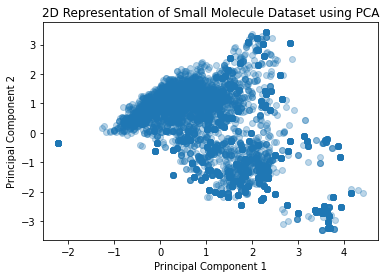

In [21]:
from sklearn.decomposition import PCA

x = [ligand.bitstring for ligand in ligands]
x = np.array(x)

pca = PCA(n_components=2)
pca.fit(x)
#print(pca.singular_values_)
x = pca.transform(x)

pc1 = x[:, 0]
pc2 = x[:, 1]

plt.scatter(pc1, pc2, alpha=0.3)
plt.title('2D Representation of Small Molecule Dataset using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Question 3:

Partitional Clustering --> Visualizing Clusters on PCA plot

In [22]:
pc = algs.PartitionClustering(ligands, numClusters=5)

In [23]:
clusters = pc.cluster(ligands, numClusters=5, verbose=True)

TypeError: cluster() got an unexpected keyword argument 'verbose'